# How has COVID-19 influenced medical interviews? 
# LSDP Project Group 2

[Section 3. RQ1 - Symptom recognition](#3) is done by Dilara Tank (12170062)

[Section 4. RQ2 - Sentiment Analysis](#4) is done by Shelby Jhorai

[Section 5. RQ3 - Question Classification](#5) is done by Rutger Ettes

# Table of Contents
* [1. Introduction](#1)
* [2. Data description](#2)
    * [2.1. MedDialog dataset (English)](#2.1)
    * [2.2. COVID-Dialogue-Dataset-English](#2.2)
* [3. RQ1 - Symptom Recognition](#3)
    * [3.1. Related Literature](#3.1)
    * [3.2. Experimental Setup](#3.2)
        * [3.2.1. Dataset Preprocessing](#3.2.1)
        * [3.2.2. Approach](#3.2.2)
        * [3.2.3. Implementation Details](#3.2.3)
    * [3.3. Evaluation](#3.3)
        * [3.3.1. Metrics](#3.3.1)
        * [3.3.2. Results](#3.3.2)
    * [3.4. Findings](#3.4)
        * [3.4.1. Illustration](#3.4.1)
        * [3.4.2. Interpretation](#3.4.2)
        * [3.4.3. Discussion](#3.4.3)
    * [3.5. Conclusion](#3.5)
        * [3.5.1. Summary](#3.5.1)
        * [3.5.2. Lessons Learned](#3.5.2)
        * [3.5.3. Directions for future work](#3.5.3)
* [4. RQ2 - Sentiment Analysis](#4)
    * [4.1. Additional Data](#4.1)
        * [4.1.1. NRC Affect Intensity Lexicon](#4.1.1)
        * [4.1.2. Global Vectors for Word Representation](#4.1.2)
    * [4.2. Method](#4.2)
        * [4.2.1.Preliminaries](#4.2.1)
        * [4.2.2. Preprocessing](#4.2.2)
        * [4.2.3. Multi-Label Classification Model](#4.2.3)
        * [4.2.4. Annotation](#4.2.4)
        * [4.2.5. VADER Sentiment Analysis](#4.2.5)
    * [4.3. Results](#4.3)
    * [4.4. Conclusion](#4.4)
* [5. RQ1 - Question Classification](#5)
    * [5.1. Related Literature](#5.1)
    * [5.2. Experimental Setup](#5.2)
        * [5.2.1. Additional Data](#5.2.1)
        * [5.2.2. Approach](#5.2.2)
        * [5.2.3. Implementation](#5.2.3)
    * [5.3. Evaluation](#5.3)
        * [5.3.1. Metrics](#5.3.1)
        * [5.3.2. Results](#5.3.2)
        * [5.3.3. Error Analysis](#5.5.5)
    * [5.4. Findings](#5.4)
        * [5.4.1. Illustration](#5.4.1)
        * [5.4.2. Interpretation](#5.4.2)
        * [5.4.3. Discussion](#5.4.3)
    * [5.5. Conclusion](#5.5)
        * [5.5.1. Summary](#5.5.1)
        * [5.5.2. Lessons Learned](#5.5.2)
        * [5.5.3. Directions for future work](#5.5.3)
* [6. Conclusions](#6)
* [7. References](#7)

# 1. Introduction <a class="anchor" id="1"></a>
The COVID-19 pandemic is a challenging time for all of us. The rapid spread and the deadliness of the virus have led to great social and economic disruption: lockdown in multiple countries, a global recession, and the closing of public areas. Healthcare workers run overtime to manage the shortage of hospital beds and treatment of the COVID-19 virus, while not much is known about it. AI models, specialized in NLP tasks, could help process COVID-19 information in medical interviews and make it more interpretable and visible. This could be of help in getting to know the virus and advising patients what to do. This project will focus on the influence of COVID-19 in medical interviews. Three different topics, research questions, and models will be discussed to answer the question: how has COVID-19 influenced medical interviews? 

There is plentiful information in medical interviews. The interviews mention symptoms, possible diseases, and ways to deal with certain symptoms.  The symptoms mentioned in an interview could be important to quickly visualize and grasp what the dialogue is about. This could especially be of importance in COVID-19 dialogue to summarize the most common symptoms of this virus. Comparing the most common symptoms in medical dialogue before and after COVID-19 could give an insight into the changes that the virus has made in these medical interviews. Therefore, the first research question is: __What are the most common symptoms before and after COVID-19 in medical interviews?__

Patients are usually afraid, sad, or worried when they have a doctor's appointment. During medical interviews, the patients discuss their concerns and symptoms with the doctor. These interviews generally have negative sentiment because if everything were all right, the patient would not be there. It would be interesting to research if the COVID-19 pandemic made the overall emotion of these interviews more negative. It might be that doctors who get asked the same questions over and over again, while the information might be publicly available, get more irritated. It could also be that patients are more afraid because of the uncertainty that this pandemic brings with it. These assumptions lead to the second research question: __How has COVID-19 influenced the emotions of medical interviews?__

When consulting a physician, online or otherwise, people usually have a rather specific question to ask. These questions could be about specific symptoms one is suffering from, about medication one is taking, or about advice on more general health related issues such as diet and exercise. Therefore, aside from the specific symptoms mentioned and the emotions conveyed within the dialogue, one might also want to know more broadly what sort of questions are asked in it. Knowledge about the types of questions asked could be used in various ways: this knowledge might be a first step towards automatically answering such a question; it could be used to automatically send a patient’s question to a relevant expert; and it could be useful to decide which questions should be answered first. With this in mind, it would be interesting to explore how the presence of COVID-19 has affected the relative amounts of types of questions asked. Therefore our third research question is: __How has COVID-19 influenced the types of questions asked by patients in medical interviews?__

The report starts with a description of two medical interview datasets ([Section 2](#2)) that are used to research the influence of COVID-19. 
In [Section 3](#3), a symptom recognition model is applied to the medical interview data. This section will discuss the first research question, the experimental setup and method, and its results. In [Section 4](#4), a multi-label classification model is built to perform Sentiment Analysis.
In [Section 5](#5).. (hier nog informatie)
Finally, we conclude our research and discuss possible improvements ([Section 6](#6)).

# 2. Data Description <a class="anchor" id="2"></a>
 
For this report, we use two datasets. The MedDialog dataset contains medical interviews that were recorded before the Corona pandemic. The COVID-Dialogue dataset contains medical interviews about COVID-19 symptoms after it started to spread. Both datasets are described below.

## 2.1. MedDialog Dataset (English) <a class="anchor" id="2.1"></a>
The [MedDialog dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) is a dataset containing medical interviews concerning pregnancy, abutment of the nerve root, pounding in the heart and more. Each entry contains an ID, description and the dialogue between doctor and patient. This dataset consists of 4 datasets, the 'icliniq' dataset will be used for this project because of the wide variety of medical subjects. An example of an interview in the dataset:

```
id=21124
https://www.icliniq.com/qa/tonsillitis/why-is-there-pain-in-throat-while-eating-or-drinking

Description
Q. Why is there pain in throat while eating or drinking?

Dialogue
Patient:
Hello doctor,
It pains a lot in my throat on right side whenever I eat or drink something. This happened after I recovered from a cough and fever. Please help.
Doctor:
Hello. It can be posterior pharyngitis or especially tonsillitis like infection. Your posterior pharynx examination has to be done. If congestion is more, then it is better to investigate with CBC (complete blood count), ASO (anti-streptolysin O titer) like further investigation. Your doctor might put you on antibiotic and decongestant course for five days. Drink lots of water. Avoid excess spicy foods. Vitamin C lozenges can be chewed frequently. Salt water gargle can be done with warm water three times a day. You can consult an otorhinolaryngologist for examination. 
```

## 2.2. COVID-Dialogue-Dataset-English <a class="anchor" id="2.2"></a>
The [COVID-Dialogue-Dataset-English](https://www.kaggle.com/xuehaihe/covid-dialogue-dataset?select=COVID-Dialogue-Dataset-English.txt) is a dataset containing 603 English medical interviews about COVID-19 related concerns. Each interview in the dataset consists of an ID, URL, description of the patient's medical condition and the dialogue between the patient and doctor. An example of an interview in the dataset:
```
id=216
https://www.healthtap.com/member/fg?page=/search/covid

Description
I'm quite sure that I have Covid-19. My mother is a health worker that has been exposed. Among my symptoms is trouble breathing and pain in the chest. Can I sleep and see how I feel tomorrow or is there a risk that I'll stop breathing in the night?

Dialogue
Patient:
I'm quite sure that I have Covid-19. My mother is a health worker that has been exposed. Among my symptoms is trouble breathing and pain in the chest. Can I sleep and see how I feel tomorrow or is there a risk that I'll stop breathing in the night?
Doctor:
Seek help. Contact to your doctor or go to ER for trouble to breath. If you go to ER they test you for covid 19. Your mother also can be  tested if symptomtic.
```

# 3. RQ1 - Symptom Recognition <a class="anchor" id="3"></a>

The research question of this section is: What are the most common symptoms before and after COVID-19 in medical interviews?

The code is designed to work as follows:

- Feed it a medical dialogue, where symptoms are discussed
- The code will extract the symptoms
- The code will display the most common symptoms in that conversation

An example can be illustrated with the following conversation: <br>
Patient: Hello doctor, these last few days I have been __coughing__ a lot.<br>
Doctor: That is unfortunate to hear, do you have any other symptoms like __sore throat__, __chest pains__, etc?<br>
Patient: I have a __cough__ and in addition to that also a __sore throat__, but that's about it.<br>
Doctor: Alright, a __cough__ and a __sore throat__ are symptoms of the Coronavirus but because of the time of year I assume you just have a __cold__. It is advised to take a test and take medicine for your __cough__ and __sore throat__.

The model would then output 'cough' and 'sore throat' as most common symtpoms discussed in this dialogue.

## 3.1. Related Literature <a class="anchor" id="3.1"></a>

__Transformers__: A transformer model is used in Natural Language Processing (NLP) for sequence-to-sequence tasks such as language translation (Vaswani et al., 2017). Transformer models apply an attention mechanism, where the model determines which parts of an input sequence are important. This results in understanding relationships between all words in a sentence, without having to worry about their respective position. Transformers consist of an encoder that maps the input sequence into a higher dimensional space and a decoder that produces an output sequence, for example a translation of the input sequence.The encoder of the Transfomers model reads the whole input sentence at once, making parallel training and processing possible. This gives it an advantace over other NLP models. 

__BERT__: BERT (Bidirectional Encoder Representations from Transformers) is a language representation model that applies a bidirectional training of Transformers to language modelling (Devlin et al., 2018). Instead of reading the input sentence from left to right or right to left, both sides are considered, making it bidirectional. Because of the bidirectionality, the model learns the context of a word based on all of its surroundings, instead of just the previous words. This allows for a deeper understanding of words and sentences. Using the fact that BERT can capture a deeper understanding of words and sentences, it can be applied to multiple NLP tasks by fine-tuning the model by adding a new layer on top of the model. The architecture of the new layer depends on the tasks one wants to do.

__RoBERTa__: RoBERTa is an extension of the BERT model, it is trained longer and on more data, providing a stronger core model (Liu et al., 2019). For NLP tasks, adding an additional layer on top is still possible.

__NER__: NER (Named Entity Recognition) tries to classify named entities mentioned in text to certain categories such as person, location, disease or symptom. It is explained before that a new layer is needed for the BERT or roBERTa model to perform NLP tasks. In the case of NER, this additional layer is a randomly initialized classifier (Vamvas, 2019). After training, this classifier outputs the most likely category of the words in the input sequence.


## 3.2. Experimental Setup <a class="anchor" id="3.2"></a>

[T-NER](https://github.com/asahi417/tner) is a python tool for language model finetuning on NER. It provides pre-trained RoBERTa models, including the pre-trained RoBERTa bc5cdr model. The bc5cdr dataset (Wei et al., 2015) consists of 1500 PubMed articles that are annotated for biomedical usage (chemicals, diseases, etc.). 

It is not reccommended to run the installations in your terminal, because inconsistencies could (and probably will) arise. Therefore, please create a new conda environment (to prevent inconsistencies) and run: \
<code>
pip install pip -U \
pip install sentencepiece \
pip install sortedcontainers==2.1.0 \
pip install tner 
</code> 
    
Additionaly you will need to have pandas and nltk installed:

<code>
pip install pandas
pip install nltk
</code>

In [1]:
# Imports
import RQ1_utils as RQ1
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
from tqdm import tqdm 
from collections import Counter
import matplotlib.pyplot as plt

from tner import TransformersNER
from pprint import pprint

[nltk_data] Downloading package punkt to /home/dilaratank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


If the T-NER import doesn't work try to do the following:
- Please open jupyter notebook in your terminal from the place where you did the installations. So if you installed the packages at '/home/user/Desktop', please navigate there in your terminal and open the notebook from there (this worked for me).
- If that doesn't work please run the code for RQ1 seperately in this google colab notebook:

<a href="https://colab.research.google.com/github/dilaratank/roBERTa-Symptom-Tracking/blob/main/Symptom_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.2.1. Dataset Preprocessing <a class="anchor" id="3.2.1"></a>

The following datasets will be used: 
- [COVID-19 Dialogue Datase](https://www.kaggle.com/xuehaihe/covid-dialogue-dataset?select=COVID-Dialogue-Dataset-English.txt) (during/after covid) 
- [MedDialog Dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) (before covid)
  - This dataset consists of 4 datasets, the 'icliniq' dataset will be used for this project because of the wide variety of medical subjects
  
The roBERTa model requires the data to be structured per sentence, which is done in the preprocessing steps. First, the data is split on dialogue to get rid of other unneccessary information. Thereafter, the data is split on sentences and saved as a .csv file for later use.

Preprocessing the data might take a while! Especially the icliniq dialogue.

In [2]:
if not os.path.exists('RQ1/saved/COVID-Dialogue-Dataset-English.csv'):
    RQ1.preprocess_to_csv('RQ1/saved/COVID-Dialogue-Dataset-English.txt', 'RQ1/saved')
if not os.path.exists('RQ1/saved/icliniq_dialogue.csv'):
    RQ1.preprocess_to_csv('RQ1/saved/icliniq_dialogue.txt', 'RQ1/saved')

# Note: If you actually want to run the code, uncomment and run the following:
# RQ1.preprocess_to_csv('data/COVID-Dialogue-Dataset-English.txt', 'RQ1/saved')
# RQ1.preprocess_to_csv('data/icliniq_dialogue.txt', 'RQ1/saved')

The data now looks like this:

In [3]:
covid_dialogue_df = pd.read_csv('RQ1/saved/COVID-Dialogue-Dataset-English.csv')
icliniq_dialogue_df = pd.read_csv('RQ1/saved/icliniq_dialogue.csv')
covid_dialogue_df.head()

,sentences
0,"Hello doctor, I get a cough for the last few d..."
1,No raise in temperature but feeling tired with...
2,No contact with any Covid-19 persons.
3,It has been four to five days and has drunk a ...
4,Doctors have shut the OP so do not know what t...


Because the Icliniq dialogue data is 60 times larger than the COVID-19 dialogue data, it will be shortened to +/ 5500 sentences. For this purpose a saved .csv file will be used so that the results will not change (due to randomness). To run this code please remove '`if not os.path.exists(...)` etc'. If you run this code, do note that the dataframe will be different each time. 

In [4]:
if not os.path.exists('RQ1/saved/icliniq_dialogue_short.csv'):
    np.random.seed(10)
    dfcopy = icliniq_dialogue_df.copy()
    remove_n = 263500
    drop_indices = np.random.choice(dfcopy.index, remove_n, replace=False)
    icliniq_dialogue_short_df = dfcopy.drop(drop_indices)
    icliniq_dialogue_short_df.to_csv('RQ1/saved/icliniq_dialogue_short.csv')
icliniq_dialogue_short_df = pd.read_csv('RQ1/saved/icliniq_dialogue_short.csv')

### 3.2.2. Approach <a class="anchor" id="3.2.2"></a>

- Use pre-trained roBERTa to extract symptoms from medical dialogue before and after COVID-19
- Display most common symtoms
- Model evaluation using accuracy score


### 3.2.3. Implementation Details  <a class="anchor" id="3.2.3"></a>

First, download the pretrained model from HuggingFace. If this doesn't work, please open this code in a google colab. 

In [5]:
trainer = TransformersNER('asahi417/tner-xlm-roberta-base-bc5cdr')

2021-03-08 13:36:32 INFO     *** initialize network ***
/home/dilaratank/anaconda3/envs/tner-env/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


For the task of determining the most used symptoms in a healhcare dialogue, the function `get_symptoms_data(df)` has been designed. It consists of 5 steps that will be discussed. The steps are also commented in the function for easier understanding and following. 

While looping over the seperate sentences in the dataframe: \
__Step 1__: First, the prediction of the sentence is extracted using the function `trainer.predict()` that is part of the T-NER package. \
__Step 2__: Second, only the predicted symptoms are extracted using the costum function `get_predicted_symptoms(prediction)`. This function returns the sympoms that are mentioned in the sentence by only selecting the predicted entities that are labelled 'disease'. \
__Step 3__: Then, all these symptoms are gathered and put in a different dataframe. Note that this layout is not structured by sentence. All the symptoms are placed seperately in the dataframe. \
__Step 4__: After that, a counter is applied to this dataframe. This allows to extract the top 5 used symptoms. \
__Step 5__: The top 5 used symptoms are extracted and plotted for easy observation. 

In [6]:
def get_predicted_symptoms(prediction):
    """
    This function takes in the prediction of a sentence of the pre-trained model 
    and returns the symptoms mentioned in that sentence.
    """
    
    symptoms = []
    
    # Check if there is a predicted entity
    if len(prediction[0]['entity']) > 0:
        number_of_entities = len(prediction[0]['entity'])
    
        # Loop over predicted entities and get symptoms (here called: disease)
        for i in range(number_of_entities):
            if prediction[0]['entity'][i]['type'] == 'disease':
                symptoms.append(prediction[0]['entity'][i]['mention'])
            
    return symptoms 

def get_symptoms_data(df):
    """
    This function takes a (preprocessed) dataframe as input, determines the predicted
    symptoms per phrase, and outputs a dictionary with the 5 most frequent symptoms used,
    while also plotting the counts of the words in a barplot. 
    
    The steps (1-5) are explained in the report. 
    """
    
    all_symptoms = []
    skipped_sentences = 0
    
    for ind in tqdm(df.index):
        sentence = df['sentences'][ind]
        
        # Padding is needed because algorithms is not used to small sentences
        if len(sentence) < 45:
            sentence = sentence+'...'
        
        # Step 1
        try:
            prediction = trainer.predict([sentence])
        except:
            skipped_sentences += 1
            continue
        
        # Step 2
        predicted_symptom = get_predicted_symptoms(prediction)
        predicted_symptom = [x.lower() for x in predicted_symptom]
        predicted_symptom = [x.split(', ')[0] for x in predicted_symptom]
        
        # Step 3
        for symptom in predicted_symptom:
            if symptom != 'coronavirus': # Remove 'coronavirus', because it is not a symptom
                all_symptoms.append(symptom)
            
    df_symptoms = DataFrame(all_symptoms,columns=['symptoms'])
    
    # Step 4
    count_symptoms = Counter()
    
    # Split on 'enter(\n)' so that grouped words stay 1 symptom
    df_symptoms['symptoms'].str.lower().str.split('\n').apply(count_symptoms.update) 

    # Most common symptoms: Step 5
    print('Skipped sentences: ', skipped_sentences)
    top5 = dict(count_symptoms.most_common(5))
    print(top5)
    plt.bar(range(len(top5)), list(top5.values()), align='center')
    plt.xticks(range(len(top5)), list(top5.keys()))
    plt.title('Most common symptoms')
    plt.show()

## 3.3. Evaluation <a class="anchor" id="3.3"></a>

### 3.3.1. Metrics <a class="anchor" id="3.3.1"></a>
The model will be evaluated using the accuracy metric. The T-NER package also included evaluation functions, but the accuracy function that is used for this research has been designed from scratch. The reason for this is because the T-NER functions needed the data to be in a different format. It has been decided that pre-processing the code again, only for that purpose, was not optimal. The accuracy function that has been developed keeps track of the total number of symptoms and the number of correctly predicted sympoms. The number of correctly predicted symptoms are then divided by the total number of symptoms, which gives the accuracy score. 

In [7]:
covid_dialogue_ann_df = pd.read_csv('RQ1/annotated_data/COVID-Dialogue-Dataset-English-annotated.csv')
icliniq_dialogue_ann_df = pd.read_csv('RQ1/annotated_data/icliniq_dialogue_nodup_annotated.csv')

The evaluation data is annotated by hand. Per sentence, the symptoms in that sentence are added to another column in the same row of the dataframe. It looks like this:

In [8]:
covid_dialogue_ann_df.head()

,sentences,symptoms
0,"Hello doctor, I get a cough for the last few d...",cough
1,No raise in temperature but feeling tired with...,"raise in temperature, tired"
2,No contact with any Covid-19 persons.,NaN
3,It has been four to five days and has drunk a ...,NaN
4,Doctors have shut the OP so do not know what t...,NaN


This will take approximately 1 or 2 minutes per dataset.

In [9]:
print('-- COVID-19 Dialogue --')
RQ1.accuracy(covid_dialogue_ann_df, trainer)
print()
print('-- Icliniq Dialogue --')
RQ1.accuracy(icliniq_dialogue_ann_df, trainer)

  0%|          | 0/507 [00:00<?, ?it/s]

-- COVID-19 Dialogue --


  0%|          | 0/500 [00:00<?, ?it/s]

Ground truth symptoms:  303
Correctly predicted symptoms  239
accuracy:  0.7887788778877888

-- Icliniq Dialogue --


100%|██████████| 500/500 [01:25<00:00,  5.82it/s]

Ground truth symptoms:  201
Correctly predicted symptoms  167
accuracy:  0.8308457711442786


### 3.3.2. Results <a class="anchor" id="3.3.1"></a>

The results for COVID-19 dialogue: 
![](RQ1/most_common_symptoms_covid.png)

100%|██████████| 4273/4273 [11:11<00:00,  6.36it/s]


Skipped sentences:  21
{'pneumonia': 323, 'fever': 196, 'cough': 174, 'sore throat': 81, 'infection': 65}


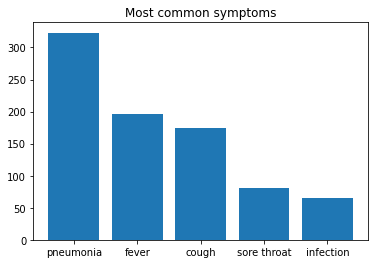

In [10]:
# Note: to run the actual code, please uncomment and run:
# get_symptoms_data(covid_dialogue_df)

The results for Icliniq dialogue:
![](RQ1/most_common_symptoms_icliniq.png)

100%|██████████| 5678/5678 [15:24<00:00,  6.14it/s]


Skipped sentences:  19
{'pain': 188, 'anxiety': 46, 'bleeding': 44, 'fever': 40, 'infection': 33}


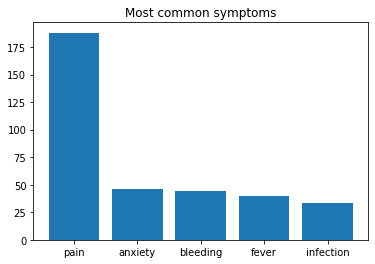

In [11]:
# Note: to run the actual code, please uncomment and run:
# get_symptoms_data(icliniq_dialogue_short_df)

## 3.4. Findings <a class="anchor" id="3.4"></a>

### 3.4.1. Illustration <a class="anchor" id="3.4.1"></a>

In the first plot (on the left) you can see the results for the COVID-19 dialogue again, and in the second plot (on the right) you can see the results for the Icliniq dialogue again. It can be seen that both results include the symptoms 'fever' and 'infection'. 

<table><tr><td><img src='RQ1/most_common_symptoms_covid.png'></td><td><img src='RQ1/most_common_symptoms_icliniq.png'></td></tr></table>

### 3.4.2. Interpretation <a class="anchor" id="3.4"></a>

The results show that pneumonia, fever, cough, sore throat and infection are the most common symptoms that patients and doctors talk about in COVID-19 related medical interviews. This seems valid, because they all actually are symptoms of COVID-19. Pneumonia is the most used symptom here, whereas before COVID-19 the most used symtpoms was pain. This is also seems valid, because in very general interviews (with general topics) pain can be used to describe a variety of areas. Furthermore, before COVID-19 the most used symptoms inclide anxiety, bleeding, fever and infection. 

It is clear that fever and infection were already important symptoms in medical interviews and with COVID-19 they stayed important, especially fever was more and more discussed. Furthermore, pain, anxiety and bleeding made way for pneumonia, cough and sore throat. 

### 3.4.3. Discussion <a class="anchor" id="3.4.3"></a>
The results can, of course, not be generalized to all medical interviews because just a sub-set of data is used for this research. However, it is still insightful to know the changes in medical dialogue before and after COVID-19. 

## 3.5. Conclusion <a class="anchor" id="3.5"></a>

### 3.5.1. Summary <a class="anchor" id="3.5.1"></a>
To determine the most common symptoms in a medical dialogue before and after COVID-19 a pre-trained RoBERTa model is used to extract symptoms from a given sequence of text. These symptoms are then collected and counted, whereafter the top 5 most common sympoms are extracted and displayed. It can be stated that the most common symptoms in COVID-19 dialogue are pneumonia, fever, cough, sore throat and infection. Whereas that used to be pain, anxiety, bleeding, fever and infection. It is clear that the symptoms went from quite general, to more ‘throat’ and ‘lung’ specific symptoms. Even though the results might not be generalized to all medical interviews out there, symptom-tracking could still be a useful tool for summarizing medical interviews or quickly displaying common symptoms for a certain disease.

### 3.5.2. Lessons learned <a class="anchor" id="3.5.2"></a>
For automatic symptom recognition, two important lessons are learned. First of all, a BERT model can be used for a variety of NLP tasks. At the core of a BERT model lies a strong Transformers model that uses bidirectionality to get to know a word and its context for a deep understanding of the word. Second, an automatic symptom recognizer and visualizer can give a glimpse of the topics discussed in medical dialogue. If the dialogue is about a certain disease, the main symptoms of this disease could easily be found and displayed. This could be used to interpret the disease. If the dialogue is about more or general diseases, the symptoms that are extracted can be used to represent the topics of the dialogue. All in all it can be said that automatic symptom extraction and visualization can be a handy tool for visually representing the main topics of medical dialogues.

### 3.5.3. Directions for future work <a class="anchor" id="3.5.3"></a>
For future work in healthcare NLP it is important to have more data available. It is a tricky issue, mainly because of privacy and intimate topics. However, more data could contribute to better models for medical NLP tasks. This issue could also partly be fixed with transfer learning. This could also be a point of focus in the future. 

# 4. RQ2 - Sentiment Analysis <a class="anchor" id="4"></a>
To measure how COVID-19 has influenced medical interviews' emotions, we have to perform Sentiment Analysis (SA). Sentiment Analysis extracts the sentiments from each utterance or the whole dialogue. The sentiment labels are positive, negative or neutral, but could also represent emotions as angry and happy. For this report, I use the emotions: anger, fear, joy, sadness, and surprise. Each dialogue can contain all or a subset of these emotions, which needs a multi-label classification model to annotate the dialogues. 
This [section](#4) describes an additional dataset that I use to annotate the medical interviews, build a multi-label classification model, and compare the distribution of both datasets' emotions.

## 4.1. Additional Data <a class="anchor" id="4.1"></a>
### 4.1.1 NRC Affect Intensity Lexicon <a class="anchor" id="4.1.1"></a>
[Mohammad (2017)](https://saifmohammad.com/WebDocs/word-affect-intensities.pdf) created the [NRC Affect Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) for eight emotions: anger, fear, joy, sadness, disgust, trust, anticipation, and surprise. 
For this report, I only use five emotions: anger, fear, joy, sadness, and surprise. For each emotion, there is a file containing two columns. The first column contains general words (e.g., furious, blessed), and the second column contains a score (e.g., 0.929, 0.833).
An example of the joy file:
```
pleasure    0.803
fulfilled   0.667
unhappiness 0.016
```
### 4.1.2 Global Vectors for Word Representation <a class="anchor" id="4.1.2"></a>
__NOTE:__ I still have to write / explain this section
[glove](https://en.wikipedia.org/wiki/GloVe_(machine_learning))

can be downloaded from [glove.6B.100d](https://nlp.stanford.edu/projects/glove/) also found in RQ2/glove folder 

## 4.2. Method <a class="anchor" id="4.2"></a>


The datasets are not annotated with emotions yet. It is time-consuming to label each dialogue with emotions by hand. In this report, the solution is to use the [NRC Affect Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) to annotate the dialogues. First, I annotate the data with the labels created during the preprocessing. Then I build a multi-label classification model to train with these annotations.
Before building and training a (supervised) multi-label classification model, the data needs to be converted to a numerical representation and labeled with emotions. [Section 4.2.2.](#4.2.2) explains the methods for cleaning, converting, and labeling the data. [Section 4.2.3.](#4.2.3) builds the multi-label classification model and [Section 4.2.4.](#4.2.4) annotates the dialogues.

### 4.2.1. Preliminaries <a class="anchor" id="4.2.1"></a>
This notebook loads the [NRC Affect Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) from the `RQ2/emotions` folder. The preprocessed data, variables, and trained model are stored in the `RQ2/saved` folder to reduce this notebook's running time. However, some cell blocks make it possible to run the code locally. Additionally, the RQ2_utils.py script compiles the import of libraries and the functions.

In [1]:
import RQ2_utils as RQ2

# paths to content of the data folder
emotions_path = 'RQ2/emotions/'
GloVe_path = 'RQ2/glove/'
COVID_file = 'data/COVID-Dialogue-Dataset-English.txt'
MED_file = 'data/icliniq_dialogue.txt'

# path to content of the saved folder
saved_path = 'RQ2/saved/'

paths = [emotions_path, GloVe_path, COVID_file, MED_file, saved_path]

### 4.2.2. Preprocessing <a class="anchor" id="4.2.2"></a>

The function `create_emotions()` shown below extracts the words and scores from each [NRC Affect Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) file and places the lemmatised words with scores above 0.6 in a dictionary with the emotion as a value. The five unique emotions are also saved as the variable `unique_emotions`.

```Python
def create_emotions(emotions_path):
    emotions = dict()
    unique_emotions = []
    lemmatizer = WordNetLemmatizer()
    _, _, files = next(walk(emotions_path))

    for file in files:
        emotion = file.replace('-scores.txt', '')
        unique_emotions.append(emotion)

        with open(emotions_path+file, 'r') as f:
            for line in f:
                word, p = line.split('\t')
                if float(p) > 0.6:
                    word = lemmatizer.lemmatize(word)
                    emotions[word] = emotion
    return unique_emotions, emotions
```

The dialogues are preprocessed by removing noise, such as URLs and punctuations, lemmatizing each word with the [WordNet Lemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html), and removing the stopwords. While lemmatizing, we only keep the nouns, adjectives, and verbs to reduce the representation's complexity.
Now, the labels are assigned to each dialogue. For each word that also occurs in the `emotions` dictionary, the corresponding emotion is added to the label. Some labels contain multiple occurrences of the same emotion. The multi-label classification model uses the set of emotions in the label. For example, the label `[anger, anger, fear, joy, joy]` results in the set `(anger, fear, joy)`, which are binarized for the multi-label-classification model.

Before adding the dialogue and label a DataFrame, we check if they are already in the DataFrame. If one instance of the duplicate data occurs in the training set and the other instance in the test set, the evaluation methods can cause incorrect results. To prevent incorrect results, I add dialogues that are not already in the DataFrame. The function `process_dataset()` combines the steps described above. The function `preprocessing()` preprocesses and merges both datasets.

```Python
def process_dataset(path, emotions):
    dialogues = split_on_dialogue(path)
    labelled = []
    for d in dialogues:
        text = clean_text(d)
        label = create_label(text, emotions)
        if (text, label) not in labelled:
            labelled.append((text, label))
    df = create_df(labelled)
    return df
```

The function `embedded_vectors()` converts the preprocessed data to embedded vectors with the [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer). 
The [GloVe word embeddings](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) convert the data to their numerical representation.

```Python
def embedded_vectors(GloVe_file, X_train, X_test):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)

    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)

    X_train = pad_sequences(X_train, padding='post', maxlen=200)
    X_test = pad_sequences(X_test, padding='post', maxlen=200)

    v_size = len(tokenizer.word_index) + 1

    embed_dict = dict()
    with open(GloVe_file, 'r') as file:
        for line in file:
            records = line.split()
            embed_dict[records[0]] = np.asarray(records[1:], dtype='float32')

    matrix = np.zeros((v_size, 100))
    for word, index in tokenizer.word_index.items():
        vector = embed_dict.get(word)
        if vector is not None:
            matrix[index] = vector

    return X_train, X_test, v_size, matrix, tokenizer
```
The function `converting()` combines splitting the data into training and test set and converting to a numerical representation used for training and evaluating the multi-label classification model. 

The function `convert_df_to_num()` converts both DataFrames to a numerical represention for annotating the data with the trained model. The training and test set, DataFrames, and variables used for this report are stored in the `RQ2/saved` folder.

The following script will load the saved DataFrames, training and test set, and variables used for this report.

In [2]:
COVID_df, MED_df = RQ2.load_dfs(saved_path)
C_vec, M_vec = RQ2.load_vectors(saved_path)
X_train, X_test, y_train, y_test = RQ2.load_x_y(saved_path)
unique_emotions, v_size, matrix = RQ2.load_variables(saved_path)

The following script, when uncommented, runs the preprocessing locally. This takes approximately 10 minutes. __However__, this step should only be run locally if you also run the classification model locally. The numerical representation of the data can differ because of the training and test set's random splitting, which influences the classification model negatively.

In [ ]:
# %%time
# COVID_df, MED_df, unique_emotions, merged_df = RQ2.preprocessing(paths)
# X_train, X_test, y_train, y_test, v_size, matrix, tokenizer = RQ2.converting(merged_df, unique_emotions, paths)
# C_vec, M_vec = RQ2.convert_df_to_num(tokenizer, COVID_df, MED_df)

### 4.2.3. Multi-Label Classification Model <a class="anchor" id="4.2.3"></a>

The function `create_model()` creates a multi-label classification model with the vocabulary size and word embeddings matrix created during the preprocessing. The model has one input layer, one embedding layer, and one [Long Short-Term Memory](https://keras.io/api/layers/recurrent_layers/lstm/) (LSTM) layer. The model also has five dense output layers with a sigmoid activation function. Each output layer corresponds to one of the emotions and returns a value between 0 and 1.

```Python
def create_model(v_size, matrix):
    input_1 = Input(shape=(200,))
    embedding_layer = Embedding(v_size, 100, weights=[matrix],
                                trainable=False)(input_1)
    LSTM_Layer1 = LSTM(128)(embedding_layer)

    output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)

    model = Model(inputs=input_1, outputs=[output1, output2, output3, output4,
                                           output5])
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['acc'])

    return model
```

The function `main_model()` creates and trains the model on the training set with 300 epochs.

The following script loads the saved model and history.

In [3]:
model = RQ2.load_trained_model(saved_path,'multilabel_model.h5')
history = RQ2.load_history(saved_path,'history.txt')

The following script, when uncommented, creates and trains the model locally. This takes approximately 10 minutes. This step can be run locally even when the preprocessed data is loaded from `RQ2/saved`.

In [ ]:
# %%time
# model, history = RQ2.main_model(X_train, y_train, v_size, matrix, 300)
# history = history.history

The following script shows the summary of the multi-label classification model.

In [4]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     759100      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

The following scripts show the loss and accuracy values for each output layer with the training and validation sets.

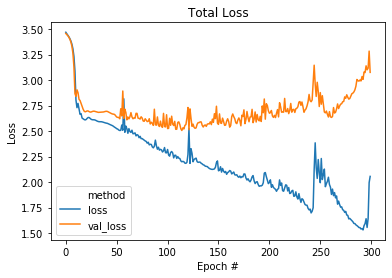

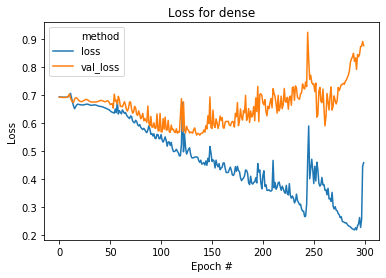

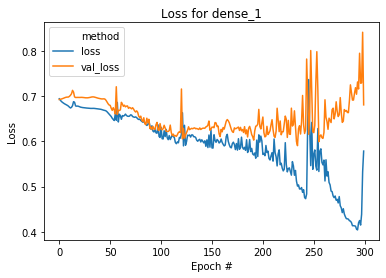

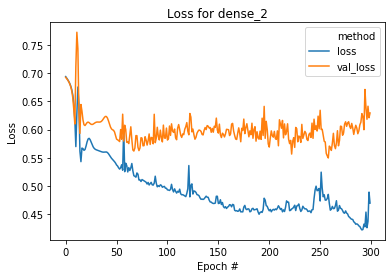

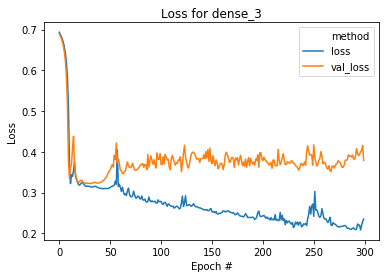

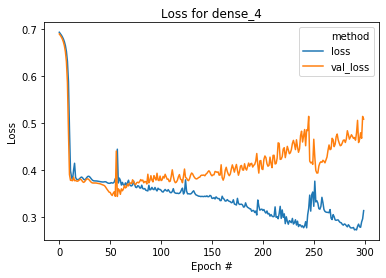

In [5]:
RQ2.plot_loss(history)

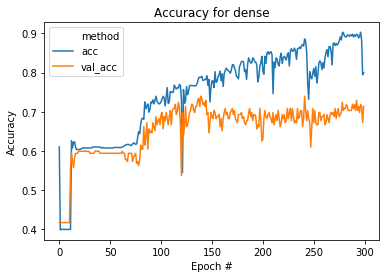

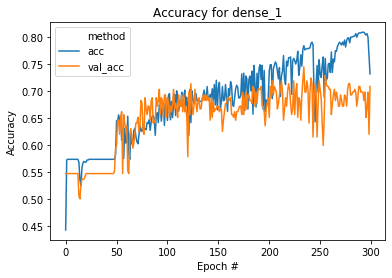

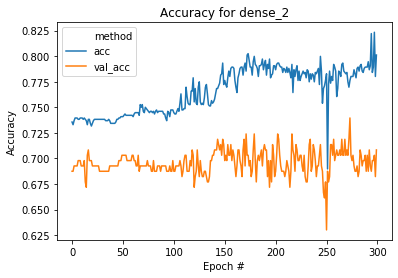

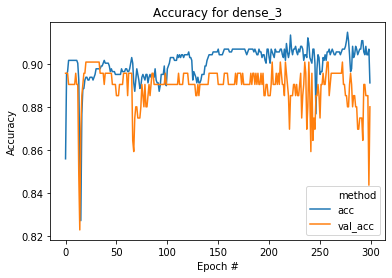

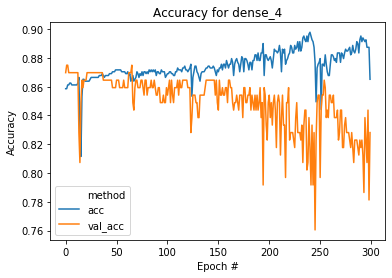

In [6]:
RQ2.plot_acc(history)

The following script evaluates the performance of the model on the test set and shows the loss and accuracy for each dense output layer.

In [7]:
RQ2.evaluate_model(model, X_test, y_test)

8/8 [==============================] - 0s 51ms/step - loss: 3.1864 - dense_loss: 0.9217 - dense_1_loss: 0.8586 - dense_2_loss: 0.5812 - dense_3_loss: 0.4881 - dense_4_loss: 0.3368 - dense_acc: 0.7000 - dense_1_acc: 0.6375 - dense_2_acc: 0.7292 - dense_3_acc: 0.8542 - dense_4_acc: 0.8958

Total loss:  3.186393976211548

dense loss:  0.9216840267181396
dense accuracy:  0.699999988079071

dense_1 loss:  0.8586356043815613
dense_1 accuracy:  0.637499988079071

dense_2 loss:  0.5812143683433533
dense_2 accuracy:  0.7291666865348816

dense_3 loss:  0.4880685806274414
dense_3 accuracy:  0.8541666865348816

dense_4 loss:  0.3367917239665985
dense_4 accuracy:  0.8958333134651184


### 4.2.4. Annotation <a class="anchor" id="4.2.4"></a>
The dialogues were first labeled by assigning emotions related to the words in the dialogues. The function `annotate()` turns the labels into a set of unique emotions to annotate the dialogues. 
The multi-label classification model that trained on the annotation above predicts the annotations of all the dialogues in the function `annotate_with_model()`
The following scripts perform the annotating and compare the annotation before and after using the multi-label classification model. 

In [8]:
%%time

COVID_lexicon = RQ2.annotate(COVID_df, unique_emotions)
MED_lexicon = RQ2.annotate(MED_df, unique_emotions)

COVID_model = RQ2.annotate_with_model(C_vec, model, unique_emotions)
MED_model = RQ2.annotate_with_model(M_vec, model,unique_emotions)

CPU times: user 1min 18s, sys: 5.43 s, total: 1min 23s
Wall time: 33.3 s


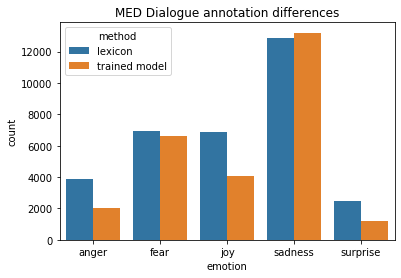

In [9]:
RQ2.compare_annotation(MED_lexicon, MED_model, 'MED Dialogue annotation differences')

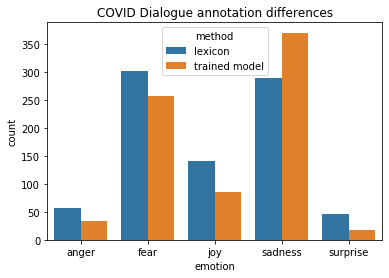

In [10]:
RQ2.compare_annotation(COVID_lexicon, COVID_model, 'COVID Dialogue annotation differences')

The figures above show that the model predicts slightly different annotations. For both datasets, the model annotates more dialogues with sadness and fewer dialogues with anger, fear, joy, and surprise.

### 4.2.5. VADER Sentiment Analysis <a class="anchor" id="4.2.5"></a>

__NOTE:__ In this subsection I briefly explain what vader sentiment analysis is. Should I do that in this subsection or should I have it explained earlier?

I perform vader sentiment analysis in this section if there is still time left.

## 4.3. Results <a class="anchor" id="4.3"></a>

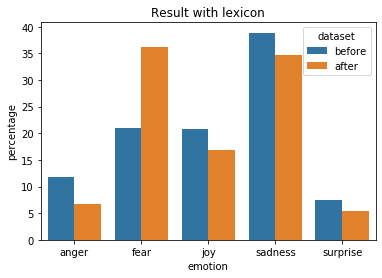

In [11]:
RQ2.compare_emotions(MED_lexicon, COVID_lexicon, 'Result with lexicon')

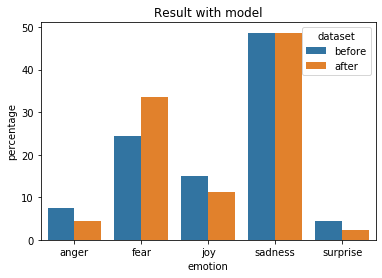

In [12]:
RQ2.compare_emotions(MED_model, COVID_model, 'Result with model')

The figures above show how the emotions in medical interviews are distributed in percentages before and after COVID-19. Using percentages instead of the actual count is because [MedDialog dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) has way more dialogues than [COVID-Dialogue-Dataset-English](https://www.kaggle.com/xuehaihe/covid-dialogue-dataset?select=COVID-Dialogue-Dataset-English.txt). The distributions in the first figure are annotated only using the NRC lexicon. As can be seen, anger, joy, sadness, and surprise decreased, and fear increased after COVID-19. The trained multi-label classification model annotates the distributions in the second figure. This figure shows similar results, except the occurrence of sadness stays relatively the same before and after COVID-19.

## 4.4. Conclusion <a class="anchor" id="4.4"></a>

This section performed Sentiment Analysis by building a multi-label classification model to annotate each medical interview with the emotions: anger, fear, joy, sadness, and surprise. The distribution of emotions in both datasets shows that these interviews generally have negative sentiments if we consider anger, fear, and sadness as negative emotions. The results show that COVID-19 has created more fear in the medical interviews, and therefore the sentiment became more negative.

improvements for RQ2 (I have to write this out more clearly)
- weights to each label so multiple occures of an emotion in a label are valued more
- train with different layers and activation functions?
- find datasets from the same institution to compare more accurately. 
- balanced datasets, sadness and fear more, model gets biased. 

## 5. RQ3 - Question Classification <a class="anchor" id="5"></a>

This section's research question is: What types of questions are asked before and after COVID-19 in medical interviews?

The code below, if given a list of questions asked by patients to doctors, will classify each of those questions in one of seven categories: Demographics related, Disease related, Treatment related, Pregnancy related, Goal oriented, Family related, or Socializing related.

For example:

"Hi doctor,
What is polyclonal hypergammaglobulinemia? Can it be related to leukemia?"

would be classified as disease related, as the question is about leukemia.

## 5.1 Related Literature <a class="anchor" id="5.1"></a>

Loni  (2011) gives an overview of the state or question classification tasks as of 2011. They discuss the state of the field with regard to various design decisions. The most prominent question taxonomy used was that of  Li & Roth(2002), which divided questions into six broad categories which are subdivided into 50 fine categories (see table 1). At the time, the decision models used were mostly support vector machines, maximum entropy models, and language models.

| Course Class | Fine Classes   |
|:-------|:---|
|    ABBR| abbreviation, expansion|
|DESC| definition, description, manner, reason|
| ENTY| animal, body, color, creation, currency, disease, event, food, instrument, <br> language, letter, other, plant, product, religion, sport, substance, symbol,<br> technique, term, vehicle, word |
|HUM |description, group, individual, title |
|LOC| city, country, mountain, other, state |
|NUM | code, count, date, distance, money, order, other, percent, percent, period,<br> speed, temperature, size, weight | 

Jalan et al. (2018) use deep learning techniques with weak supervision to classify questions from a task first proposed at ICHI 2016, though there seems to be no information available about this task outside of Jalan et al. (2018). The task consists of medical forum posts each tagged with one of seven labels based on the intent of the user. The winning team at the ICHI 2016 conference achieved a 68.00\% accuracy, with a combination of the classifications of a random forest, support vector machines, logistic regression and a convolutional neural network. Jalan et al. (2018) achieve a 71.13\% accuracy score through the classifications of a hierarchical bidirectional LSTM, a deep network based on TFIDF vectors, and a deep network based on the “Strength of Association” of a class with certain multi-word medical entities.

Lewis et al. (2020) compare the performance of various pre-existent models pretrained on medical and clinical data on various medical tasks, such as named entity recognition and text classification tasks. They also compare the models with a general purpose RoBERTa model as a baseline and create a model of their own. They show that models pretrained on domain specific knowledge consistently outperform a RoBERTa baseline of the same size, with BioBERT doing best. Even so, a larger RoBERTa model still outperforms them on clinical tasks, but not on PubMed based tasks.


## 5.2 Experimental Setup <a class="anchor" id="5.2"></a>

### 5.2.1 Additional Data <a class="anchor" id="5.2.1"></a>

To classify the patients’ questions in the MedDialog and COVID datasets, our model was first pre-trained on the ICHI 2016 question qualification dataset, as discussed by Jalan et al. (2018) This dataset was sourced from the zip file made available in Jalan et al. (2018) with their code and the data (https://tinyurl.com/medCat18). The dataset is made up of questions sourced from a medical forum. While this is different to the MedDialog and COVID Datasets, which are both sourced from websites in which people can ask actual doctors medical questions, they are quite similar as both mostly consist of normal people asking for help with a medical issue. This is advantageous because the more similar the two datasets are, the more likely the results in one are to carry over to the other. Furthermore, most other question datasets consist of shorter questions, instead of the longer multi-sentence questions asked in both the ICHI and MedDialog Datasets.

The dataset consists of a train and a test dataset, both of which consist of the class labels, a title, and the full question. For the model input the string of the title and the full question were combined, as was done by Jalan et al (2018). Jalan et al. (2018) describe the question taxonomy as follows:

- Demographic (DEMO): Questions targeted towards specific demographic sub-groups characterized by age, gender, profession, ethnicity, etc
- Disease (DISE): Questions related to a specific disease.
- Treatment (TRMT): Questions related to a specific treatment or procedure.
- Goal-oriented (GOAL): Questions related to achieving a health goal, such as weight management, exercise regimen, etc.
- Pregnancy (PREG): Questions related to pregnancy, difficulties with conception, mother and unborn child’s health during pregnancy.
- Family support (FMLY): Questions related to issues of a caregiver (rather than a patient), such as support of an ill child or spouse.
- Socializing (SOCL): Questions related to socializing, including hobbies and recreational activities, rather than a specific health-related issue.


For each of these classes there are roughly the same amount of questions.


### 5.2.2 Approach <a class="anchor" id="5.2.2"></a>

To classify the questions, we make use of microsoft’s PubMedBERT(Gu et al., 2020) , which is based of the BERT(Devlin  et  al.,  2018)   architecture. BERT  is a large deep learning model pre-trained on the BooksCorpus dataset and on english wikipedia. The major difference between BERT and the models that came before it are that BERT uses context from both before and after a word to predict it, while earlier models mostly only used context from before a word. This allowed it to perform better than many of the similar models that came before it. To use BERT (or similar models pre-trained on large corpora)  for a task that it wasn’t originally trained for, one has to finetune it. This means swapping out the input and output layers for ones appropriate for the new task and then training it on the new data. This two step approach allows models such as BERT to first learn about the language, and then learn about the specific task you want it to perform, instead of having to do both at once, like was the case with older types of deep learning models. This pretraining step where the model essentially learns the language is not restricted to literally just learning a language like English, French, or Portuguese, though. One can also use this step to learn about domain specific knowledge, which means you learn a version of English relevant to a certain type of task.
 
 PubMedBERT is a version of BERT that does the same for medical research. Instead of BooksCorpus and English wikipedia, it is trained on abstracts from PubMed and full papers from PubMedCentral. This allows it to perform better than BERT on biomedical tasks, and even better than models that first train on BooksCorpus and wikipedia and then on PubMed. As it is based on BERT, PubMedBERT can, in principle, also be trained to perform any specific task, while retaining and making use of its medical domain knowledge.
 
PubMedBERT and other models based on BERT use full text excerpts to train on, so beyond tokeization with the PubMedBERT tokenizer, no preprocessing of the data such as removal of stopwords, lemmatization, etc. is necessary.
 


### 5.2.3 Implementation <a class="anchor" id="5.2.3"></a>

The implementation of the PubMedBERT model used here relies on huggingface’s transformers library (Wolf et al., 2020) and PubMedBERT, as found on huggingface’s model hub. And most of the code used for the training of the model was adapted from [the finetuning tutorial](https://huggingface.co/transformers/master/custom_datasets.html) in the transformers documentation for this specific task.

To run the following code a few non-standard libraries must be installed, so before you go on, make sure to run the following commands.

Firstly, you need the proper version of torch installed for the device you will be running this on, as well as cuda if you will be running it on a gpu.

The version needed for google colab was:
 
```
!pip install torch===1.7.1+cu110 torchvision===0.8.2+cu110 torchaudio===0.7.2 torchtext===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
```

The latest version of CUDA that torch is compatible with can be downloaded from [CUDA 11.1](https://developer.nvidia.com/cuda-11.1.0-download-archive).


```
!pip install transformers
!pip install deepspeed
!pip install mpi4py
```

This code was tested in google colab, but outside of colab one may have trouble getting deepspeed and mpi4py to work. Deepspeed also needs a GPU to work. In the case you cannot use deepspeed, delete the following arguments from training_args:

```
local_rank=0,
deepspeed='RQ3/ds_config.json',
```

as well as from the imports:

```
from deepspeed.utils import logger
logger.setLevel(50)
```






In [32]:
import torch
import transformers
import pandas as pd
import numpy as np
import sklearn
import csv
import torch
import matplotlib.pyplot as plt
from collections import Counter
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import RQ3_utils
from deepspeed.utils import logger
logger.setLevel(50)

To use the COVID and MedDialog datasets with the classfier, we must first extract all the patients' questions from it and remove everything else. This process is relatively straightforward because the first part of the interview is always a patient's question.

In principle all datasets have been prepared to for use in the prepare_datasets function, but should you want to create *dataCOVID-Dialogue-Dataset-English_questions.tsv* and *dataicliniq_dialogue_questions.tsv* from scratch, simply run the following function with the desired input and output filepaths:


```
RQ3.preprocess_to_tsv(data_path, save_to)
```


In [33]:
ichi_train_path = 'RQ3/data/ICHI2016-TrainData.tsv'
ichi_test_path = 'RQ3/data/new_ICHI2016-TestData_label.tsv'
icliniq_annotated_path = 'RQ3/data/icliniq_annotated.tsv'
COVID_annotated_path = 'RQ3/data/COVID_annotated.tsv'
icliniq_path = 'RQ3/data/dataicliniq_dialogue_questions.tsv'
COVID_path = 'RQ3/data/dataCOVID-Dialogue-Dataset-English_questions.tsv'

The transformers' Trainer needs the data to be in pytorch datasets consisting of the correct labels and the encodings produced by tokenizing the questions with PubMedBERT's tokenizer. To prepare these pytorch datasets for all of the datasets, run the following cell. Training PubMedBERT also requires a validation dataset as well as the test and training datasets. This validation dataset has been created out of 20% of the original training dataset. The remaining 80% is used for the actual training dataset.

In [34]:
filepaths = [ichi_train_path,
ichi_test_path,
icliniq_annotated_path,
COVID_annotated_path,
icliniq_path,
COVID_path]

(train_dataset, val_dataset, test_dataset,
icliniq_annotated_dataset, COVID_annotated_dataset,
icliniq_dataset, COVID_dataset) = RQ3_utils.prepare_datasets(filepaths)

The trainer class takes several arguments with which one can customize the process. Most of the arguments used here are standard, except for the fact the model used at the end of training isn't the one with the lowest training loss, but the one with the highest accuracy. apart from this, we also make use of  deepspeed Rasley et al. (2020).  Deepspeed is a library which allows for significantly faster training of large models.  This effect is lessened somewhat because of the fact we only use a single GPU, and by the fact evaluation slows the  process  down  somewhat. Regardless, using deepspeed still speeds up  the process significantly.

In [35]:
training_args = TrainingArguments(
    output_dir='RQ3/results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='RQ3/logs',            # directory for storing logs
#     local_rank=0,
#     deepspeed='RQ3/ds_config.json',
    load_best_model_at_end=True,
    evaluation_strategy='steps',
    eval_steps=100,
    metric_for_best_model= 'accuracy',
    logging_steps = 100,
    save_total_limit=2
)

The cell below initializes our pretrained model for use. If you want to train a new PubMedBERT model instead, uncomment and run the cell below it. Training takes anywhere from 15 minutes to 1.5 hours to complete, depending on whether you use deepspeed and what device you use for training.

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained('RQ3/model', num_labels=7).to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=RQ3_utils.compute_metrics
)

In [37]:
# model = AutoModelForSequenceClassification.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext", num_labels=7)

# trainer = Trainer(
#     model=model,                         # the instantiated 🤗 Transformers model to be trained
#     args=training_args,                  # training arguments, defined above
#     train_dataset=train_dataset,         # training dataset
#     eval_dataset=val_dataset,             # evaluation dataset
#     compute_metrics=RQ3_utils.compute_metrics
# )

# trainer.train()

To make predictions with the saved or a newly trained model, run the code below. The *dataset\_name*\_predictions are the raw outputs of the model, with *dataset\_name*\_pred_labels being the actual class labels for each question. *dataset\_name*\_metrics is a dict containing various metrics such as accuracy and f1 scores for each class. running this may take a while.

In [38]:
test_predictions, _, test_metrics = trainer.predict(test_dataset)
COVID_annotated_predictions, _, COVID_annotated_metrics = trainer.predict(COVID_annotated_dataset)
icliniq_annotated_predictions, _, icliniq_annotated_metrics = trainer.predict(icliniq_annotated_dataset)
COVID_prediction, _, _ = trainer.predict(COVID_dataset)
icliniq_prediction, _, _ = trainer.predict(icliniq_dataset)

test_pred_labels = [i.argmax() for i in test_predictions]
COVID_annotated_pred_labels = [i.argmax() for i in COVID_annotated_predictions]
icliniq_annotated_pred_labels = [i.argmax() for i in icliniq_annotated_predictions]
COVID_pred_labels = [i.argmax() for i in COVID_prediction]
icliniq_pred_labels = [i.argmax() for i in icliniq_prediction]

C:\Users\Rutger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rutger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.3 Evaluation <a class="anchor" id="5.3"></a>

### 5.3.1 Metrics <a class="anchor" id="5.3.1"></a>

The metrics used for evaluation are chiefly the overall accuracy, and the class f1 scores. Additionally class precision and recall are used in case one is disproportionately higher than the other. Calculation of these metrics occurs automatically via the compute\_metrics function which is given as an argument to the trainer. As explained previously, metrics for each dataset with ground truth labels is accesible via the *dataset\_name*\_metrics variables created in the cell above.

### 5.3.2 Results <a class="anchor" id="5.3.2"></a>

To calculate the results for each dataset, each of the metrics were average over 5 different runs with a different split in training and validation set. On the validation dataset the model achieves an accuracy of 70.18% accuracy on the validation set, and one of 68.76% on the test dataset.  This is better than the winning team at ICHI 2016 (68.00%) , but worse than Jalan et al. (2018), who achieved 71.13%. The worst categories is DEMO, which has an f1 score of 0.516.  The best categories are PREG, and GOAL, which both get an f1 of 87.5 and 82.0, respectively.

To test how well the model does the  model on the COVID and icliniq datasets I annotated 100 questions from each by hand. On the COVID data the model achieves an accuracy of 64.6%. On the icliniq data the model achieves an accuracy of only 48.6%.

below is a table with the full results for each dataset.


In [39]:
pd.read_csv('RQ3/data/question_results.csv', index_col=[0,1])

DEMO      DISE      FAML      GOAL      PREG      SOCL  \
val     f1         0.538108  0.665161  0.884336  0.848204  0.707415  0.612927   
        precision  0.557876  0.621248  0.848100  0.825894  0.689693  0.720130   
        recall     0.521199  0.717069  0.924595  0.872218  0.727967  0.536134   
        accuracy   0.701750  0.701750  0.701750  0.701750  0.701750  0.701750   
test    f1         0.516876  0.632905  0.875006  0.820052  0.699887  0.618365   
        precision  0.538114  0.589757  0.843567  0.770530  0.692653  0.718417   
        recall     0.498630  0.683636  0.909264  0.876667  0.710233  0.544218   
        accuracy   0.687629  0.687629  0.687629  0.687629  0.687629  0.687629   
COVID   f1         0.000000  0.806879  0.392397  0.000000  0.000000  0.000000   
        precision  0.000000  0.800446  0.966667  0.000000  0.000000  0.000000   
        recall     0.000000  0.813889  0.261538  0.000000  0.000000  0.000000   
        accuracy   0.646000  0.646000  0.646000  0.646000  0.646000  0.646000   
icliniq f1         0.270766  0.681725  0.344874  0.279719  0.635294  0.057143   
        precision  0.271538  0.623035  0.920000  0.277123  0.650000  0.033333   
        recall     0.272727  0.753488  0.216667  0.283333  0.622222  0.200000   
        accuracy   0.486000  0.486000  0.486000  0.486000  0.486000  0.486000   

                       TRMT  
val     f1         0.613620  
        precision  0.644183  
        recall     0.591205  
        accuracy   0.701750  
test    f1         0.630674  
        precision  0.665364  
        recall     0.602934  
        accuracy   0.687629  
COVID   f1         0.315784  
        precision  0.409286  
        recall     0.260000  
        accuracy   0.646000  
icliniq f1         0.139299  
        precision  0.193571  
        recall     0.116667  
        accuracy   0.486000

### 5.3.3 Error analysis <a class="anchor" id="5.3.3"></a>

The error analysis for these results consist of two main parts: why the general accuracy only reaches about 70%; and why the COVID and icliniq data get lower accuracy scores than the test dataset.

To know why the accuracy of the classifier only reaches around 70% for both our classifier and that of Jalan et al. (2018), we will look at where the errors come from. If not the true class, what does the model predict instead? As can be seen in the images below, the DEMO class has significant overlap with PREG but also SOCL. The overlap with PREG can be explained by the fact that one of the most prominent demographic divides in DEMO is that between men and women, and issues specific to women, such as issues with the female genitalia are often classified as DEMO. However, some of the most prominent female-specific heath issues relate to pregnancy. with this in mind it might be the case that DEMO isn't a very well designed class. 

there also exist other cases where one could argue multiple apply, which causes ambiguity. If a patient mentions a treatment they had for a specific disease, it could be hard to decide whether it should be classified TRMT or DISE. And when talking about a way to help with weight loss, should that be considered TRMT or GOAL?

outside of these more general issues with the model, it also performed much worse on the COVID and icliniq datasets, especially when considering they are much more imbalanced than the test dataset. There may be several reasons for this: the one that immediately comes to mind is that the two datasets and the ICHI dataset simply aren't similar enough for results to carry over. This is possible, but I wouldn't know what the differences in the questions are beyond the fact that some question types occur much more often. Instead I think it is more likely that I made some mistakes in annotating the two datasets due to not having access to the original thought process of and guidelines for the original annotators. Furthermore, there isn't any information about the dataset available from the ICHI 2016 conference, but only the explanations by Jalan et al. (2018). This, combined with the general ambiguity prsent within this question taxonomy, may have caused me to annotate some questions incorrectly which then led to the classifier performing seemingly worse on the annotated data.


<table><tr><td><img src='RQ3/misclass_test.JPG'></td><td><img src='RQ3/misclass_COVID.JPG'></td><td><img src='RQ3/misclass_icliniq.JPG'></td></tr><tr><td text-align: center>test dataset</td><td text-align: center>COVID dataset</td><td text-align: center>icliniq dataset</td></tr></table>

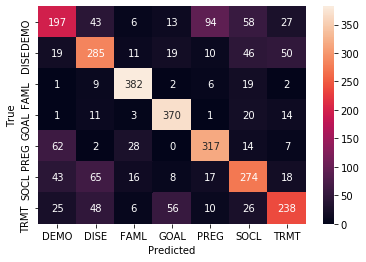

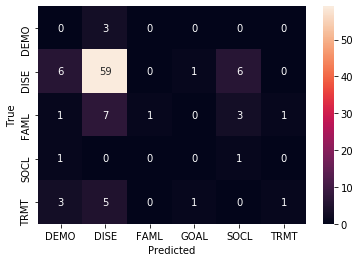

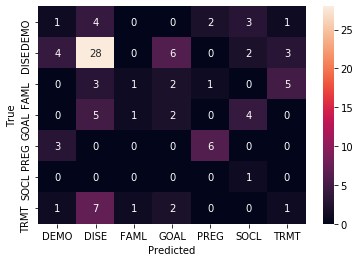

In [40]:
RQ3_utils.make_misclassification_heatmap(test_dataset.labels, test_pred_labels)
RQ3_utils.make_misclassification_heatmap(COVID_annotated_dataset.labels, COVID_annotated_pred_labels)
RQ3_utils.make_misclassification_heatmap(icliniq_annotated_dataset.labels, icliniq_annotated_pred_labels)

## 5.4 Findings <a class="anchor" id="5.4"></a>

### 5.4.1 Illustration <a class="anchor" id="5.4.1"></a>

The image below shows a grouped bar chart comparing the relative frequency of each class in the COVID dataset with that of the icliniq dataset. the cell under it can be used to reproduce the bar chart.

<img src='RQ3/bar.JPG'></td><td>

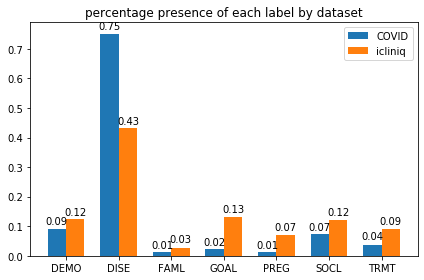

In [41]:
RQ3_utils.make_grouped_bar_chart(COVID_pred_labels, icliniq_pred_labels)

### 5.4.2 Interpretation <a class="anchor" id="5.4.2"></a>

It can be seen in the bar chart that the DISE category is much larger in the COVID dataset compared to the icliniq dataset. All the other categories are less prevalent in the COVID dataset. This result is expected, seeing as the COVID dataset consists of interviews about COVID-19, a disease. The icliniq dataset isn't as specific in its contents, and therefore has less questions about diseases, relatively.

DEMO seems to have shrunk less in the COVID dataset compared to the other classes, this might be because COVID-19 does affect certain demographics more than others, such as people over 65. SOCL also shrank relatively little, this might be because questions about social distancing can be classified as being about socializing.

### 5.4.3 Discussion <a class="anchor" id="5.4.3"></a>

Due to the fact the accuracy of the model isn't high, these reults and interpretations must be taken witha grain of salt. Though, due to the fact the low score on the annotated datasets may reflect more on the quality of my annotations than that of the model, they shouldn't be done away with entirely. 



## 5.5 Conclusion <a class="anchor" id="5.5"></a>

### 5.5.1 Summary <a class="anchor" id="5.5.1"></a>

The research question for this subsection was: What types of questions are asked before and after COVID-19 in medical interviews?

To answer this question, we took questions from online medical interviews and classified them using a PubMedBERT model. the classifier was trained on the ICHI 2016 dataset. On the test dataset the model achieved a 68.76%, which is comparable to scores previously achieved on this dataset. To test whether these results carry over to the questions from the medical interviews, we also tested the model on a dataset of hand annoated questions from the interviews. on these datasets the model performed significantly worse, but it is unclear whether that is because of differences between the ICHI data and the interview questions or due to inaccuracies in annotating.

Using the model predicted classes for the other interview questions. We found that compared to general pre-COVID-19 questions, the questions about COVID-19 were classified as being related to a disease much more often.

### 5.5.2 Lessons Learned <a class="anchor" id="5.5.2"></a>

For this section there are several lessons learned:

Models based on BERT can be used for a wide variety of tasks and achieve results comparable to much more elaborate methods, with very little effort. 
Properly gauging how well a model does ona new dataset can be very difficult, especially if proper instructions for annotation aren't available.
When creating a system of classifications, one must consider whether the boundaries between categories are clear otherwise annotating will be ambiguous and models will perform worse.

### 5.5.3 Directions for future work <a class="anchor" id="5.5.3"></a>

It is clear that  due to several reasons using the ICHI dataset and its corresponding question taxonomy isn't ideal for answering this question. For further research it would be useful to either annotate much more data from medical interviews so it can be used in finetuning and not just evaluation. Due to having to annotate much more data anyway, further research also isn't obligated to make use of the question taxonomy that the ICHI dataset does. It might therefore also be worthwhile to design a new question taxonomy with less inherent ambiguity and which is possibly designed to be used in the real world, such as for matching patients and relevant specialists more easily.

# 6. Conclusions <a class="anchor" id="6"></a>

rq1: more lung-related symptoms and issues instead of general symptoms. 

rq2: the results show that COVID-19 has created more fear in the medical interviews, and therefore the sentiment became more negative.

rq3: more questions about specific diseases, less questions about treatment, goal-orientation, demography, pregnancy, family support and socializing.

It can be concluded that COVID-19 has changed medical interviews in the following way: first of all, the symptoms and questions became more specific to COVID-19 related topics Instead of discussing general symptoms about multiple diseases, specific COVID-19 related symptoms were discussed. Also, instead of asking general health-related questions about treatment and family support for example, more disease-specific questions were asked. Also the overall sentiment of the medical interviews has become more negative.  
It should be noted that the COVID-19 dialogue dataset focuses specifically on COVID-19 related interviews and topics. For further improvements in this research area, a dataset should be used that is (1) collected during or after the spread of COVID-19, (2) and about the same subject, for example in the lung department. This is needed to make a more general conclusion about the impact of COVID-19 in all health related conversations. 
 


# 7. References

__RQ1__ <br>
Chih-Hsuan  Wei,  Yifan  Peng,  Robert  Leaman,  Al-lan  Peter  Davis,   Carolyn  J.  Mattingly,   Jiao  Li,Thomas   C.   Wiegers,    and   Zhiyong   Lu.   2015.Overview  of  the  BioCreative  V  Chemical  DiseaseRelation (CDR) Task.   InProceedings of the FifthBioCreative Challenge Evaluation Workshop. pages154–166.

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). Bert: Pre-training of deep 
bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805.

Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). Roberta: A robustly optimized bert pretraining approach. arXiv preprint arXiv:1907.11692.

Vamvas, J. (2019). BERT for NER. Von https://vamvas.ch/bert-for-ner.

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. arXiv preprint arXiv:1706.03762.

__RQ3__ <br>
Devlin, J., Chang, M., Lee, K., & Toutanova, K.  (2018).  BERT: pre-trainingof  deep  bidirectional  transformers  for  language  understanding.CoRR,abs/1810.04805.  Retrieved fromhttp://arxiv.org/abs/1810.04805

Gu, Y., Tinn, R., Cheng, H., Lucas, M., Usuyama, N., Liu, X., . . .  Poon, H.(2020).Domain-specific  language  model  pretraining  for  biomedical  naturallanguage processing.

Jalan, R., Gupta, M., & Varma, V. (2018). Medical forum question classificationusing deep learning. InEuropean conference on information retrieval(pp. 45–58).

Lewis, P., Ott, M., Du, J., & Stoyanov, V.  (2020).  Pretrained language modelsfor biomedical and clinical tasks:  Understanding and extending the state-of-the-art. InProceedings of the 3rd clinical natural language processing workshop(pp. 146–157).

Li, X., & Roth, D.  (2002).  Learning question classifiers.  InColing  2002:  The19th international conference on computational linguistics.

Loni, B. (2011). A survey of state-of-the-art methods on question classification.

Rasley, J., Rajbhandari, S., Ruwase, O., & He, Y.  (2020).  Deepspeed:  Systemoptimizations enable training deep learning models with over 100 billion pa-rameters.  InProceedings of the 26th acm sigkdd international conference onknowledge discovery & data mining(pp. 3505–3506).

Wolf,  T.,  Debut,  L.,  Sanh,  V.,  Chaumond,  J.,  Delangue,  C.,  Moi,  A.,  . . .Rush,  A.  M.(2020,  October).Transformers:   State-of-the-art  naturallanguage  processing.    InProceedings  of  the  2020  conference  on  empiricalmethods  in  natural  language  processing:   System  demonstrations(pp.  38–45).   Online:   Association  for  Computational  Linguistics.   Retrieved  fromhttps://www.aclweb.org/anthology/2020.emnlp-demos.6